In [565]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.axes_style("darkgrid")
import numpy as np
import sklearn
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

In [566]:
tweets = pd.read_csv("../../data/processed_data/climate_change_tweets.csv")
tweets.drop(columns=['Unnamed: 0'], inplace=True)
merged = pd.read_csv("../../data/processed_data/data_nyc.csv")
merged.drop(columns=['GEOID'], inplace=True)
# rename columns of merged 
merged.rename(columns={'GEOID10_x': 'GEOID10'}, inplace=True)

tweets.GEOID10 = tweets.GEOID10.astype(str)
tweets.aggressiveness = tweets.aggressiveness.factorize()[0]

awater = gpd.read_file("../../data/external_data/tl_2020_36_tract10/tl_2020_36_tract10.shp")
counties = ['36005', '36047', '36061', '36081', '36085']
mask = awater.GEOID10.str[:5].isin(counties)
awater = awater[mask]
awater = awater[['GEOID10', 'geometry']]

In [579]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203434 entries, 0 to 203433
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_at       203434 non-null  object 
 1   lng              203434 non-null  float64
 2   lat              203434 non-null  float64
 3   topic            203434 non-null  object 
 4   sentiment        203434 non-null  float64
 5   stance           203434 non-null  object 
 6   temperature_avg  203434 non-null  float64
 7   aggressiveness   203434 non-null  int64  
 8   geometry         203434 non-null  object 
 9   GEOID10          203434 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 15.5+ MB


In [581]:
# tweets.to_latex()

print(tweets.iloc[0:5, 0:5].to_latex(index=False, sparsify=True, float_format="%.2f", longtable=False))

\begin{tabular}{lrrlr}
\toprule
               created\_at &    lng &   lat &            topic &  sentiment \\
\midrule
2006-07-23 21:52:30+00:00 & -73.95 & 40.65 & Weather Extremes &       0.58 \\
2007-01-06 17:36:51+00:00 & -73.95 & 40.65 & Weather Extremes &      -0.57 \\
2007-01-17 02:18:13+00:00 & -73.95 & 40.65 & Weather Extremes &       0.03 \\
2007-02-02 18:15:51+00:00 & -73.95 & 40.65 & Weather Extremes &       0.16 \\
2007-03-16 19:11:10+00:00 & -74.01 & 40.71 & Weather Extremes &      -0.38 \\
\bottomrule
\end{tabular}



/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/1098033809.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tweets.iloc[0:5, 0:5].to_latex(index=False, sparsify=True, float_format="%.2f", longtable=False))


In [453]:
high_tree_high_water = pd.read_csv("../../data/processed_data/high_tree_high_water_2.csv").columns
high_tree_low_water = pd.read_csv("../../data/processed_data/high_tree_low_water_2.csv").columns
low_tree_high_water = pd.read_csv("../../data/processed_data/low_tree_high_water_2.csv").columns
low_tree_low_water = pd.read_csv("../../data/processed_data/low_tree_low_water_2.csv").columns

In [454]:
awater['class'] = 'high_tree_high_water'
awater.loc[awater.GEOID10.isin(high_tree_high_water), 'class'] = 'high_tree_high_water'
awater.loc[awater.GEOID10.isin(high_tree_low_water), 'class'] = 'high_tree_low_water'
awater.loc[awater.GEOID10.isin(low_tree_high_water), 'class'] = 'low_tree_high_water'
awater.loc[awater.GEOID10.isin(low_tree_low_water), 'class'] = 'low_tree_low_water'
awater

,GEOID10,geometry,class
0,36085024800,"POLYGON ((-74.25817 40.50816, -74.25813 40.508...",high_tree_high_water
1,36085025100,"POLYGON ((-74.15356 40.61275, -74.15314 40.614...",high_tree_high_water
2,36085027301,"POLYGON ((-74.16329 40.60168, -74.16248 40.604...",high_tree_high_water
3,36085027302,"POLYGON ((-74.14567 40.58997, -74.14563 40.590...",high_tree_high_water
4,36085030301,"POLYGON ((-74.16848 40.62156, -74.16814 40.622...",low_tree_high_water
...,...,...,...
4836,36081107202,"POLYGON ((-73.85352 40.58659, -73.84985 40.588...",high_tree_high_water
4837,36081012500,"POLYGON ((-73.91988 40.77223, -73.91977 40.772...",high_tree_high_water
4838,36081029400,"POLYGON ((-73.78916 40.66834, -73.78883 40.669...",high_tree_low_water
4839,36081061301,"POLYGON ((-73.90060 40.71270, -73.90018 40.712...",low_tree_low_water


In [455]:
awater['class'].value_counts()

high_tree_high_water    581
low_tree_high_water     529
high_tree_low_water     529
low_tree_low_water      529
Name: class, dtype: int64

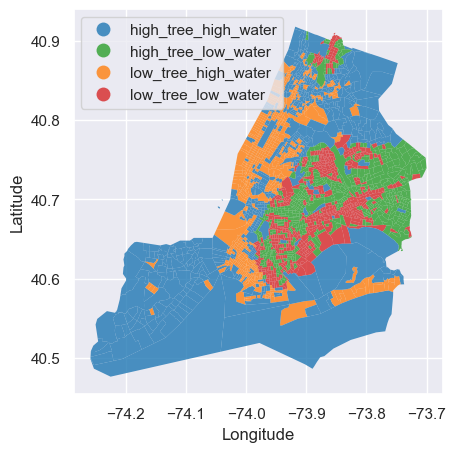

In [456]:
from matplotlib.colors import ListedColormap

# take first 4 colors from tab10
palette_tab10 = sns.color_palette("tab10", 10)
palette = sns.color_palette([palette_tab10[0], palette_tab10[2], palette_tab10[1], palette_tab10[3]])
my_cmap = ListedColormap(palette.as_hex())

m = Basemap(llcrnrlon=-79, llcrnrlat=40.49, urcrnrlon=-71.96, urcrnrlat=45.01,
            resolution='i', projection='tmerc', lat_0=40.5, lon_0=-74.25)

# use multicolor legend and plot class as categorical and no boundary and add colorbar and gridlines
awater.plot(column='class', categorical=True, legend=True, ax=m.ax, edgecolor='none', legend_kwds={'loc': 'upper left'}, cmap=my_cmap, alpha=0.8)

# add gridlines
sns.set(style="ticks")
sns.set_style("darkgrid")

plt.grid(True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [457]:
hthw = tweets[tweets.GEOID10.isin(high_tree_high_water)].reset_index(drop=True)
hthw['day'] = pd.to_datetime(hthw['created_at']).dt.dayofyear
ts_hthw = hthw.groupby('day').mean()[['sentiment', 'temperature_avg', 'aggressiveness']]
sd_hthw = hthw.groupby('day').std()[['sentiment', 'temperature_avg', 'aggressiveness']]
ts_hthw['day'] = ts_hthw.index

lthw = tweets[tweets.GEOID10.isin(low_tree_high_water)].reset_index(drop=True)
lthw['day'] = pd.to_datetime(lthw['created_at']).dt.dayofyear
ts_lthw = lthw.groupby('day').mean()[['sentiment', 'temperature_avg', 'aggressiveness']]
sd_hthw = lthw.groupby('day').std()[['sentiment', 'temperature_avg', 'aggressiveness']]
ts_lthw['day'] = ts_lthw.index

htlw = tweets[tweets.GEOID10.isin(high_tree_low_water)].reset_index(drop=True)
htlw['day'] = pd.to_datetime(htlw['created_at']).dt.dayofyear
ts_htlw = htlw.groupby('day').mean()[['sentiment', 'temperature_avg', 'aggressiveness']]
sd_htlw = htlw.groupby('day').std()[['sentiment', 'temperature_avg', 'aggressiveness']]
ts_htlw['day'] = ts_htlw.index

ltlw = tweets[tweets.GEOID10.isin(low_tree_low_water)].reset_index(drop=True)
ltlw['day'] = pd.to_datetime(ltlw['created_at']).dt.dayofyear
ts_ltlw = ltlw.groupby('day').mean()[['sentiment', 'temperature_avg', 'aggressiveness']]
sd_ltlw = ltlw.groupby('day').std()[['sentiment', 'temperature_avg', 'aggressiveness']]
ts_ltlw['day'] = ts_ltlw.index

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/1167082240.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_hthw = hthw.groupby('day').mean()[['sentiment', 'temperature_avg', 'aggressiveness']]
/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/1167082240.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sd_hthw = hthw.groupby('day').std()[['sentiment', 'temperature_avg', 'aggressiveness']]
/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/1167082240.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future

In [458]:
# ts_hthw.sentiment.plot()

Text(0, 0.5, 'Sentiment')

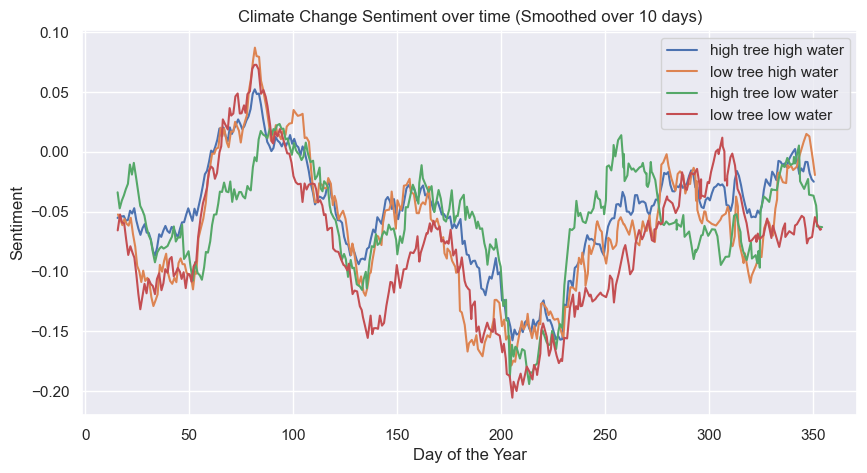

In [461]:
# plottes all the time series after exponential smoothing using sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

# set sns figure size
sns.set(rc={'figure.figsize':(10, 5)})
sns.lineplot(data=ts_hthw.rolling(10).mean(), x='day', y='sentiment', label='high tree high water')
sns.lineplot(data=ts_lthw.rolling(10).mean(), x='day', y='sentiment', label='low tree high water')
sns.lineplot(data=ts_htlw.rolling(10).mean(), x='day', y='sentiment', label='high tree low water')
sns.lineplot(data=ts_ltlw.rolling(10).mean(), x='day', y='sentiment', label='low tree low water')
plt.title('Climate Change Sentiment over time (Smoothed over 10 days)')
plt.xlabel('Day of the Year')
plt.ylabel('Sentiment')

Text(0.5, 0, 'Day of the Year')

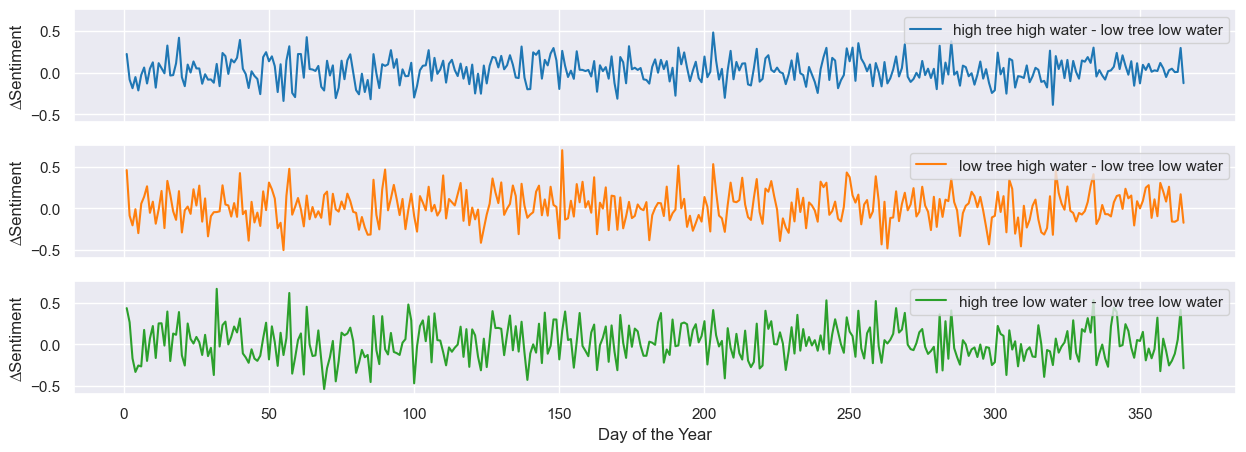

In [462]:
fig, axes = plt.subplots(3, 1, figsize=(15, 5), sharey=True, sharex=True)
palette_tab10 = sns.color_palette("tab10", 10)
labels = ['high tree high water - low tree low water', 'low tree high water - low tree low water', 'high tree low water - low tree low water']
# compare two time series
for i, ts in enumerate([ts_hthw, ts_lthw, ts_htlw]):
    # plot on a new sns figure    
    df = ts.sentiment - ts_ltlw.sentiment
    # rename the column
    df = df.rename('∆Sentiment')
    # plot on sns subplot without ylabels
    sns.lineplot(data=df, ax=axes[i], color=palette_tab10[i], label=labels[i])
# plt.title('Difference in climate change sentiment over time', color = 'red')
plt.xlabel('Day of the Year')

Text(0.5, 1.0, 'Cumulative Climate Change Sentiment over Time')

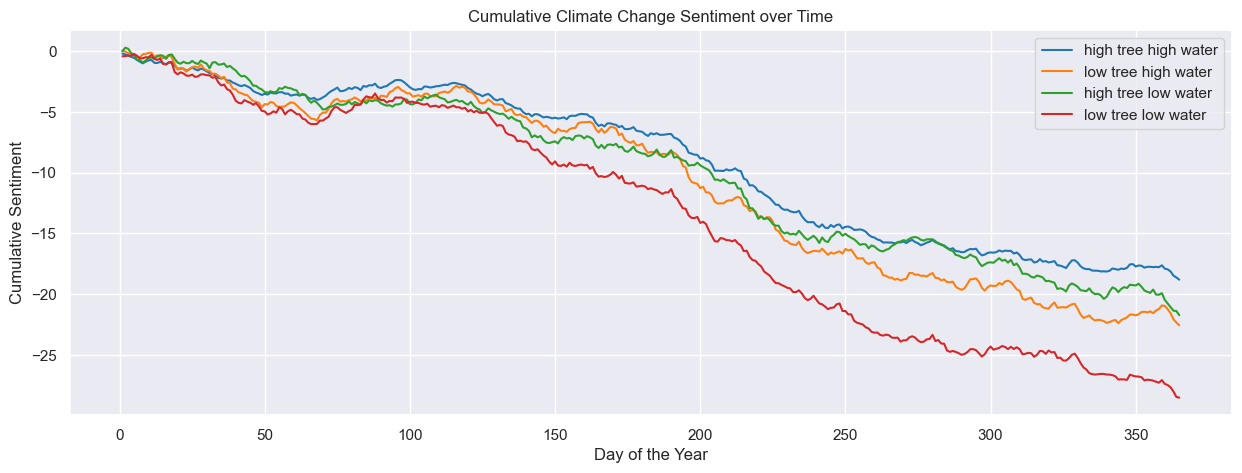

In [550]:
# get cumulative sentiment on an sns plot
sns.set(rc={'figure.figsize':(15, 5)})
labels = ['high tree high water', 'low tree high water', 'high tree low water', 'low tree low water']
for i, ts in enumerate([ts_hthw, ts_lthw, ts_htlw, ts_ltlw]):
    # plot on a new sns figure    
    df = ts.sentiment.cumsum()
    # plot on sns subplot
    sns.lineplot(data=df, color=palette_tab10[i], label=labels[i])
    
plt.xlabel('Day of the Year')
plt.ylabel('Cumulative Sentiment')
plt.title('Cumulative Climate Change Sentiment over Time')

In [464]:
# aggregate the tweets by 6 hour intervals over the four classes
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
df = tweets.groupby(['GEOID10', pd.Grouper(key='created_at', freq='4H')]).mean().reset_index()
df['class'] = 'high tree high water'
labels = ['high tree high water', 'high tree low water', 'low tree high water', 'low tree low water']
for i, c in enumerate([high_tree_high_water, high_tree_low_water, low_tree_high_water, low_tree_low_water]):
    mask = df.GEOID10.isin(c)
    df.loc[mask, 'class'] = labels[i]

df['Interval'] = df.created_at.dt.hour

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/962258386.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = tweets.groupby(['GEOID10', pd.Grouper(key='created_at', freq='4H')]).mean().reset_index()


/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/1796876636.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby(['class', 'Interval']).mean().reset_index().pivot(index='Interval', columns='class', values='sentiment')
/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/1796876636.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_std = df.groupby(['class', 'Interval']).std().reset_index().pivot(index='Interval', columns='class', values='sentiment') / (100000*np.sqrt(n))


Text(0.5, 1.0, 'Mean Sentiment by Hour of the Day')

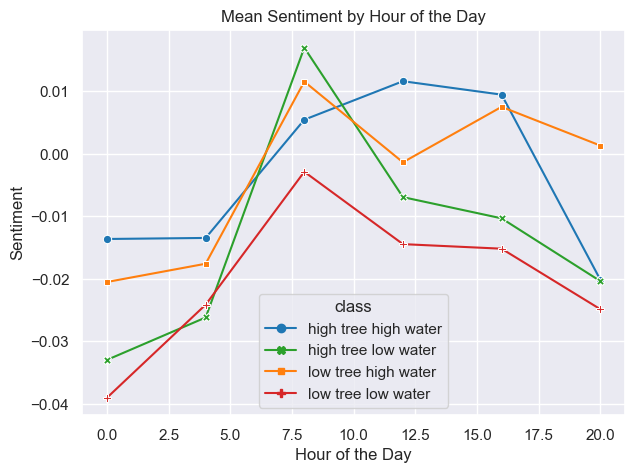

In [466]:
# set sns figure size
sns.set(rc={'figure.figsize':(7, 5)})
# plot mean and std of sentiment over time
temp = df.groupby(['class', 'Interval']).mean().reset_index().pivot(index='Interval', columns='class', values='sentiment')

n = df.groupby(['class', 'Interval']).count().reset_index().pivot(index='Interval', columns='class', values='sentiment')
temp_std = df.groupby(['class', 'Interval']).std().reset_index().pivot(index='Interval', columns='class', values='sentiment') / (100000*np.sqrt(n))

palette_tab10 = sns.color_palette("tab10", 10)
palette = sns.color_palette([palette_tab10[0], palette_tab10[2], palette_tab10[1], palette_tab10[3]])

# plot temp using sns
palette_tab10 = sns.color_palette("tab10", 10)
sns.lineplot(data=temp, palette=palette, markers=True, dashes=False)

# plot error bars using sns 
# for i, c in enumerate(['high tree high water', 'high tree low water', 'low tree high water', 'low tree low water']):
#     df_ = (temp[[c]] - temp_std[[c]]).reset_index()
#     sns.pointplot(data=df_, x='Interval', y=c, color=palette[i], linestyles='', markers='o', scale=0.5)

plt.ylabel('Sentiment')
plt.xlabel('Hour of the Day')
plt.title('Mean Sentiment by Hour of the Day')

In [467]:
df

,GEOID10,created_at,lng,lat,sentiment,temperature_avg,aggressiveness,class,Interval
0,36005000100,2017-12-05 08:00:00+00:00,-73.880970,40.790660,0.039858,5.821789,1.0,high tree high water,8
1,36005000200,2018-11-29 20:00:00+00:00,-73.859965,40.814716,-0.467750,0.769352,1.0,high tree high water,20
2,36005000200,2019-05-14 12:00:00+00:00,-73.859965,40.814716,0.003635,0.769352,0.0,high tree high water,12
3,36005000400,2018-06-10 20:00:00+00:00,-73.849170,40.805560,-0.575455,0.769352,0.0,high tree high water,20
4,36005000400,2018-07-07 08:00:00+00:00,-73.849170,40.805560,0.150346,0.769352,1.0,high tree high water,8
...,...,...,...,...,...,...,...,...,...
46234,36085027704,2019-09-29 16:00:00+00:00,-74.149605,40.583456,-0.078468,1.438618,1.0,low tree high water,16
46235,36085029103,2014-05-05 00:00:00+00:00,-74.163200,40.593440,-0.512248,-0.568022,0.0,high tree high water,0
46236,36085029103,2018-05-12 12:00:00+00:00,-74.163200,40.593440,0.470843,0.655705,1.0,high tree high water,12
46237,36085030302,2013-12-18 00:00:00+00:00,-74.158541,40.623893,0.111002,-4.898505,1.0,high tree high water,0


In [ ]:
from scipy import stats
ts1 = ts_hthw.sentiment
ts2 = ts_ltlw.sentiment
diff = (ts1 - ts2) / sd_ltlw.sentiment
diff.fillna(0, inplace=True)
# estimate difference distribution as gaussian kernel density
kde = stats.gaussian_kde(diff)
kde.covariance_factor = lambda : .25

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-3, 3, 100), kde(np.linspace(-3, 3, 100)))
# plot mean and median
plt.axvline(diff.mean(), color='k', linestyle='--')
plt.axvline(diff.median(), color='r', linestyle='--')

# plot histogram distribution and normalise to 1
diff.hist(bins=100, density=True)

plt.xlim(-2, 2)

Text(0.5, 1.0, 'Climate Change Sentiment Density (with mean shown)')

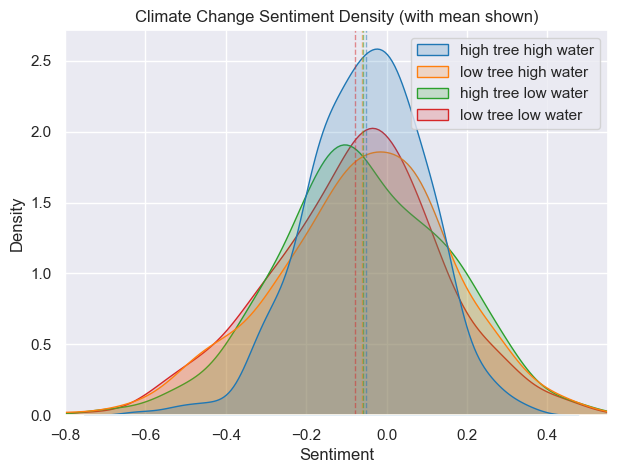

In [551]:
# do kde plot using sns
import seaborn as sns

# make dataframe of all four time series
df = pd.DataFrame({'high tree high water': ts_hthw.sentiment, 'low tree high water': ts_lthw.sentiment, 'high tree low water': ts_htlw.sentiment, 'low tree low water': ts_ltlw.sentiment})

# set sns figure size
sns.set(rc={'figure.figsize':(7, 5)})

# plot kde all four time series and turn off common normalisation using facetgrid


sns.kdeplot(
   data=df, 
   fill=True, common_norm=False, palette="tab10",
   alpha=.2, linewidth=1, bw_adjust=1
)


# plot mean and median on sns plot
palette_tab10 = sns.color_palette("tab10", 10)
for i in range(4):
    plt.axvline(df.iloc[:, i].mean(), linestyle='--', alpha=0.5, linewidth=1, color=palette_tab10[i])
    # give label on x axis
    # plt.text(df.iloc[:, i].mean(), 0.5, df.columns[i], rotation=90, fontsize=6)

# # set x limits
plt.xlim(-0.80, 0.55)
plt.xlabel('Sentiment')
plt.title('Climate Change Sentiment Density (with mean shown)')



# ax = sns.kdeplot(hthw.sentiment, shade=True, bw_adjust=1)
# ax = sns.kdeplot(lthw.sentiment, shade=True, bw_adjust=1)
# ax = sns.kdeplot(htlw.sentiment, shade=True, bw_adjust=1)
# ax = sns.kdeplot(ltlw.sentiment, shade=True, bw_adjust=1)
# # plot mean and median
# ax.axvline(diff.mean(), color='k', linestyle='--')

In [494]:
# check if difference time series is stationary using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

for col in ['high tree high water', 'low tree high water', 'high tree low water']:
    series = df[col] - df['low tree low water']
    adf = adfuller(series, autolag='AIC')
    print(adf)

(-20.305877044022942, 0.0, 0, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, -318.622707657535)
(-10.330489193693875, 2.85100098998349e-18, 4, 360, {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}, -146.64983462628277)
(-20.249565074565304, 0.0, 0, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, -90.77629198993202)


Shapiro-Wilk test p-value: 0.9706836938858032
Sample looks Gaussian (fail to reject H0)


/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/440706906.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=stats.norm, ax=ax[1])


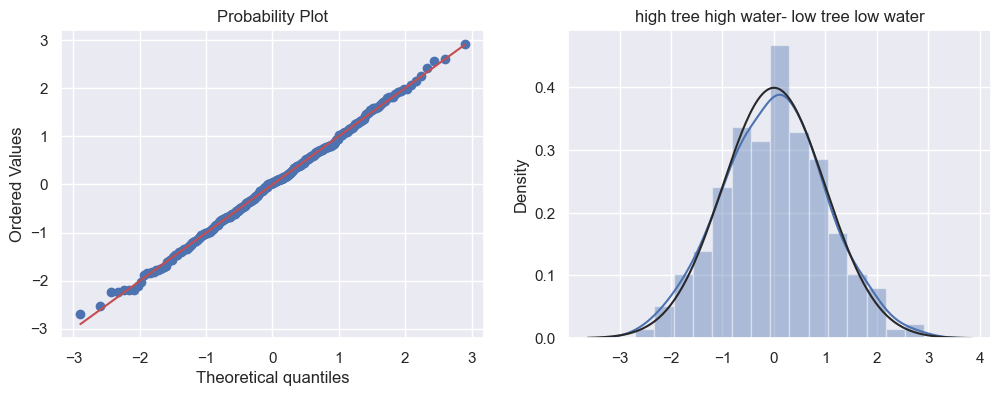

Shapiro-Wilk test p-value: 0.7267100811004639
Sample looks Gaussian (fail to reject H0)


/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/440706906.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=stats.norm, ax=ax[1])


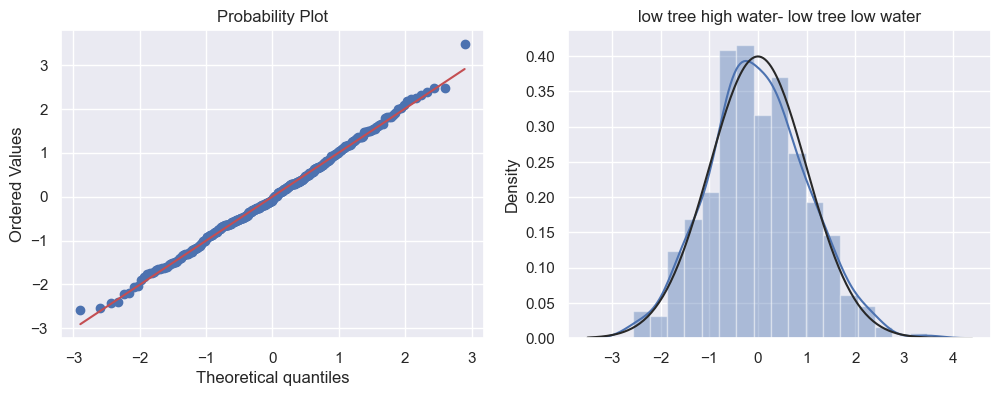

Shapiro-Wilk test p-value: 0.08973187953233719
Sample looks Gaussian (fail to reject H0)


/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_24905/440706906.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=stats.norm, ax=ax[1])


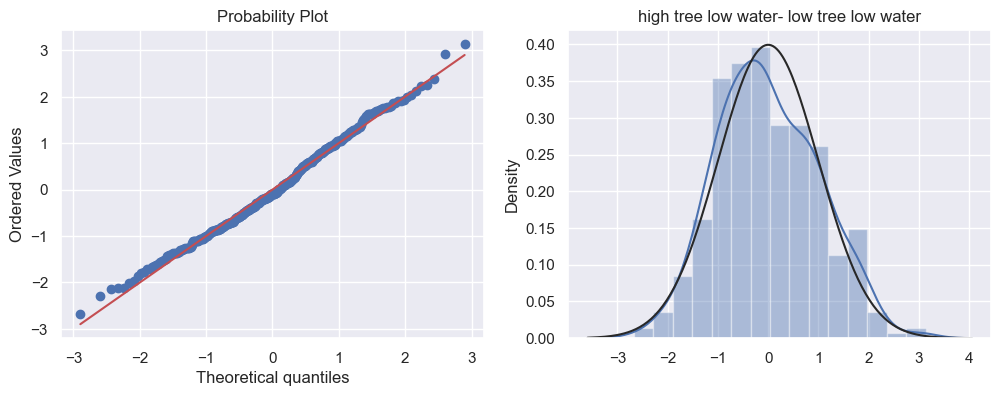

In [535]:
# plot histogram of difference time series using sns

# for col in ['high tree high water', 'low tree high water', 'high tree low water']:
#     series = df[col] - df['low tree low water']
#     sns.distplot(series, hist=True, kde=True, label=col, bins=100)
# plt.legend()

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

def test_normality(data, alpha=0.05, title=''):
    """
    Function to test normality of a series using QQ plots, histogram, and statistical testing
    data: the series to test
    alpha: significance level for statistical tests
    """
    # Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    print("Shapiro-Wilk test p-value:", p)
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")
    
    # QQ plot and histogram
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    res = stats.probplot(data, plot=ax[0])
    sns.distplot(data, fit=stats.norm, ax=ax[1])
    plt.title(title)
    plt.show()

# Example usage
for col in ['high tree high water', 'low tree high water', 'high tree low water']:
    series = df[col] - df['low tree low water']
    # normalise series
    series = (series - series.mean()) / series.std()
    test_normality(series, alpha=0.05, title=col + '- low tree low water')

In [ ]:
from scipy.stats import wilcoxon, ttest_1samp, ttest_ind
series_hthw = df['high tree high water'] - df['low tree low water']
series_lthw = df['low tree high water'] - df['low tree low water']
series_htlw = df['high tree low water'] - df['low tree low water']

# tstat, pvalue = ttest_1samp(series_lthw, 0, alternative='greater')
# print(pvalue)

t_statistic, p_value = ttest_ind(series_htlw, series_lthw, equal_var=False, alternative='greater')

print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

In [ ]:
t_statistic, p_value = ttest_ind(series_hthw, series_hthw - series_lthw - 0.003, equal_var=False, alternative='greater')
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

In [ ]:
from scipy.stats import mannwhitneyu
series_hthw = df['high tree high water'] - df['low tree low water']
series_lthw = df['low tree high water'] - df['low tree low water']
series_htlw = df['high tree low water'] - df['low tree low water']

# calculate sample mean and standard deviation
print(series_hthw.mean(), series_hthw.std() / np.sqrt(len(series_hthw)))
print(series_lthw.mean(), series_lthw.std() / np.sqrt(len(series_lthw)))
print(series_htlw.mean(), series_htlw.std() / np.sqrt(len(series_htlw)))




stat, p = mannwhitneyu(series_lthw, series_hthw, alternative='less')
print(stat, p)
stat, p = mannwhitneyu(series_htlw, series_hthw, alternative='less')
print(stat, p)
stat, p = mannwhitneyu(series_htlw, series_lthw, alternative='less')
print(stat, p)

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     348.2
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           5.79e-55
Time:                        20:02:04   Log-Likelihood:                -18.907
No. Observations:                 365   AIC:                             41.81
Df Residuals:                     363   BIC:                             49.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0277      0.014     -1.939      0.0

<AxesSubplot: xlabel='day'>

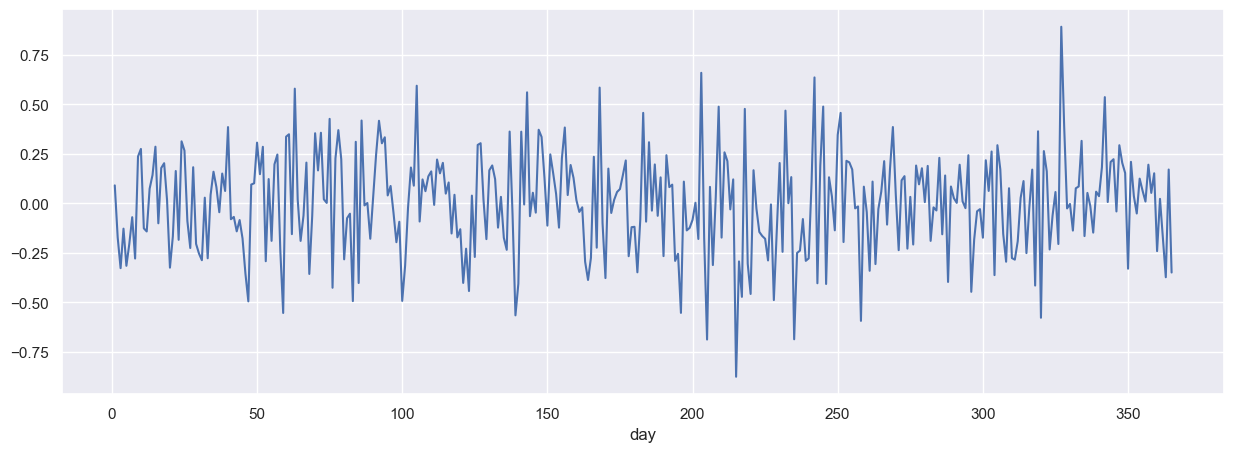

In [472]:
# do linear regression using stat ols between diff and ts2
from statsmodels.formula.api import ols
formula = 'diff ~ ts2'
ols_model = ols(formula, data=pd.DataFrame({'diff': diff, 'ts2': ts2})).fit()
print(ols_model.summary())

# plot residuals
ols_model.resid.plot()

In [ ]:
diff_hthw = (ts_hthw.sentiment - ts_ltlw.sentiment) / sd_ltlw.sentiment
diff_hthw.fillna(0, inplace=True)

diff_htlw = (ts_htlw.sentiment - ts_ltlw.sentiment) / sd_ltlw.sentiment
diff_htlw.fillna(0, inplace=True)

diff_lthw = (ts_lthw.sentiment - ts_ltlw.sentiment) / sd_ltlw.sentiment
diff_lthw.fillna(0, inplace=True)

diff_ltlw = (ts_ltlw.sentiment - ts_ltlw.sentiment) / sd_ltlw.sentiment
diff_ltlw.fillna(0)

In [ ]:
# run t test on difference time series
from scipy import stats

types = ['hthw', 'htlw', 'lthw']
for i in range(3):
    for j in range(i+1, 3):
        print('t-test for {} and {}:'.format(types[i], types[j]))
        print(stats.ttest_ind(eval('diff_{}'.format(types[i])), eval('diff_{}'.format(types[j]))))